Let's start by downloading the given dataset. Since it weights a lot when unziped - we'll upload it zipped

In [ ]:
import pandas as pd

In [ ]:
!rm -rf 'filtered.tsv'
!unzip filtered_paranmt.zip

Archive:  filtered_paranmt.zip
  inflating: filtered.tsv            


In [ ]:
df = pd.read_csv("filtered.tsv", sep="\t", index_col=[0])

In [ ]:
df.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Basic statistics
num_pairs = len(df)
avg_ref_length = df['reference'].apply(lambda x: len(x.split())).mean()
avg_trans_length = df['translation'].apply(lambda x: len(x.split())).mean()

print(f"Number of sentence pairs: {num_pairs}")
print(f"Avg. reference length: {avg_ref_length}")
print(f"Avg. translation length: {avg_trans_length}")

Number of sentence pairs: 577777
Avg. reference length: 10.28342422768646
Avg. translation length: 9.680459762157373


In [ ]:
avg_ref_toxicity = df['ref_tox'].mean()
avg_trans_toxicity = df['trn_tox'].mean()

print(f"Number of sentence pairs: {num_pairs}")
print(f"Avg. reference toxicity: {avg_ref_toxicity}")
print(f"Avg. translation toxicity: {avg_trans_toxicity}")

Number of sentence pairs: 577777
Avg. reference toxicity: 0.5413717990275281
Avg. translation toxicity: 0.4344898352213311


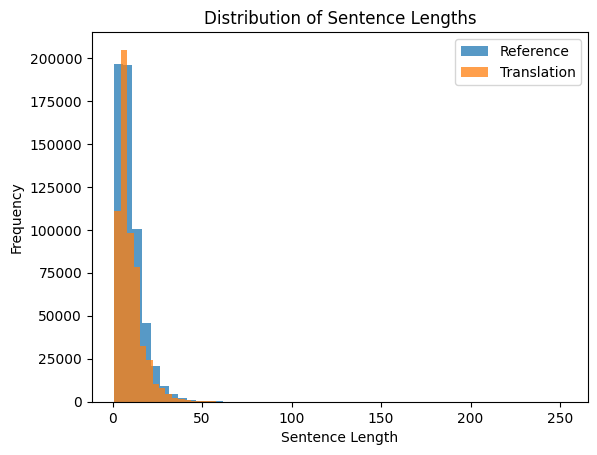

In [ ]:
# Distribution of reference and translation sentence lengths
plt.hist(df['reference'].apply(lambda x: len(x.split())), bins=50, alpha=0.75, label='Reference')
plt.hist(df['translation'].apply(lambda x: len(x.split())), bins=50, alpha=0.75, label='Translation')
plt.legend()
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.show()

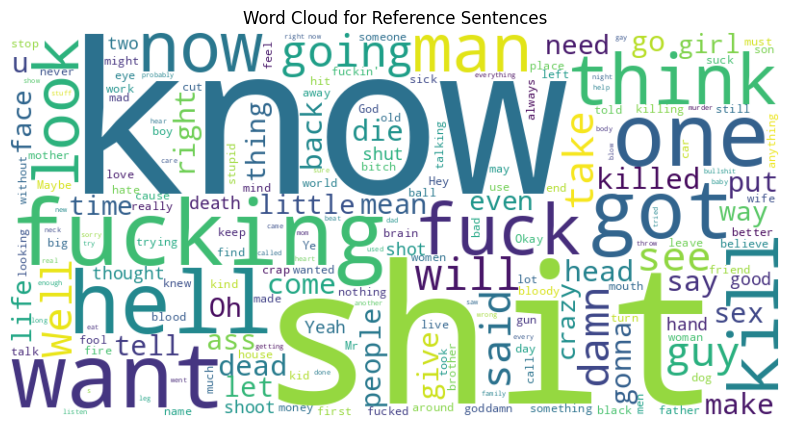

In [ ]:
# Word cloud for reference sentences
ref_text = ' '.join(df['reference'])
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(ref_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reference Sentences')
plt.show()

In [ ]:
# Check for toxicity level imbalances
toxicity_distribution = df['ref_tox'].value_counts()
print(toxicity_distribution)

# Display random sample pairs
random_samples = df.sample(5)
for index, row in random_samples.iterrows():
    print(f"Reference: {row['reference']} (Toxicity: {row['ref_tox']})")
    print(f"Translation: {row['translation']} (Toxicity: {row['trn_tox']})")
    print(f"Similarity: {row['similarity']}")
    print("\n")


0.957792    163
0.945304    158
0.979246    138
0.999343    125
0.630641    103
           ... 
0.014807      1
0.485066      1
0.719269      1
0.943100      1
0.009480      1
Name: ref_tox, Length: 435822, dtype: int64
Reference: Its sole purpose is the training and conditioning of professional killers. (Toxicity: 0.0610917061567306)
Translation: her only purpose is to train pre-determined professional killers. (Toxicity: 0.7633614540100098)
Similarity: 0.7382818693909999


Reference: It was a foolish impulse, but the devil begotten of fear and blind anger was ill curbed and still eager to take advantage of my perplexity. (Toxicity: 0.9622342586517334)
Translation: it was a foolish movement of mind, but the devil, who rose yesterday in my soul in fear and blind rage, was yet to be fully contained, and he still wanted to capitalise on my confusion. (Toxicity: 0.2168154269456863)
Similarity: 0.748593864718


Reference: Exactly. - Crazy! (Toxicity: 0.9648557305336)
Translation: this is c

In [ ]:
def swap_toxicity(row):
    toxic_second = row['ref_tox'] < row['trn_tox']
    if toxic_second:
        tmp = row['trn_tox']
        row['trn_tox'] = row['ref_tox']
        row['ref_tox'] = tmp
        tmp = row['translation']
        row['translation'] = row['reference']
        row['reference'] = tmp
    return row


In [ ]:
df = df.apply(swap_toxicity, axis = 1)

In [ ]:
# Basic statistics
num_pairs = len(df)
avg_ref_length = df['reference'].apply(lambda x: len(x.split())).mean()
avg_trans_length = df['translation'].apply(lambda x: len(x.split())).mean()

print(f"Number of sentence pairs: {num_pairs}")
print(f"Avg. reference length: {avg_ref_length}")
print(f"Avg. translation length: {avg_trans_length}")

Number of sentence pairs: 577777
Avg. reference length: 10.112025920034892
Avg. translation length: 9.85185806980894


In [ ]:
avg_ref_toxicity = df['ref_tox'].mean()
avg_trans_toxicity = df['trn_tox'].mean()

print(f"Number of sentence pairs: {num_pairs}")
print(f"Avg. reference toxicity: {avg_ref_toxicity}")
print(f"Avg. translation toxicity: {avg_trans_toxicity}")

Number of sentence pairs: 577777
Avg. reference toxicity: 0.94026024110816
Avg. translation toxicity: 0.03560139314069938


In [ ]:
df = df.sort_values(by='trn_tox', ascending=False)
df = df.sort_values(by='similarity', ascending=False)
df

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
81036,I've spent the last seven years with four smel...,I've spent the last seven years with four men.,0.950000,0.129630,0.990042,0.000041
76374,tell me something I don't fucking know.,Tell me something I don't know!,0.949999,0.200000,0.971418,0.000079
301221,you're such a fucking tough guy.,You're such a Tough guy.,0.949997,0.242424,0.977852,0.000238
366599,someone tried to kill her with an injection of...,Someone tried to kill her by injecting the virus?,0.949996,0.137931,0.980873,0.102180
202891,I could look at women's legs for hours.,I could look at a woman's legs for hours.,0.949996,0.047619,0.941838,0.006438
...,...,...,...,...,...,...
203161,That person will soon die.,soon he will be.,0.600003,0.370370,0.927170,0.000049
223080,I doubt he'll ask you to kill a man.,I doubt that's what he's gonna ask.,0.600003,0.027027,0.992090,0.000069
468104,"We should buy shit in bulk, man We'll put it o...","we should buy hash in a big one, then go to th...",0.600003,0.050000,0.998426,0.002392
417114,I'll be in your stupid class next semester.,I'm in your bleeding class next term.,0.600002,0.136364,0.999616,0.010900


In [ ]:
MAX_SIZE = 50000
df = df.head(MAX_SIZE)

In [ ]:
output_path = 'processed.tsv'
df.to_csv(output_path, sep='\t', index=False, header=True)

So this dataset is now ready to be used later